In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [79]:
from imblearn.over_sampling import SMOTE

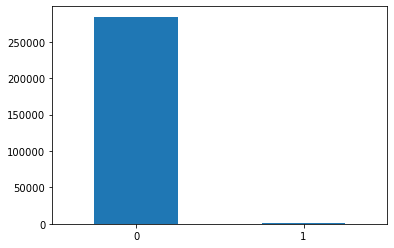

In [80]:
count=pd.value_counts(df['Class'])
count.plot(kind='bar',rot=0)

In [81]:
X=df.drop('Class',axis=1)
y=df['Class']

In [82]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [83]:
X_res.shape

(568630, 30)

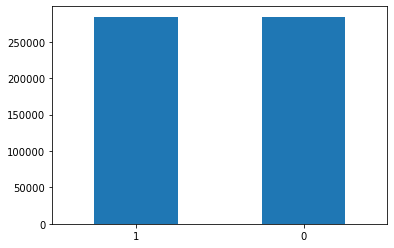

In [84]:
count=pd.value_counts(y_res)
count.plot(kind='bar',rot=0)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [86]:
model=RandomForestClassifier(n_estimators=5)

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=0)

In [88]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [89]:
y_pred=model.predict(X_test)

In [90]:
from sklearn.metrics  import confusion_matrix,accuracy_score

In [91]:
confusion_matrix(y_pred,y_test)

array([[56700,     7],
       [   24, 56995]])

In [92]:
accuracy_score(y_test,y_pred)

0.9997274150150361